In [36]:
from tkinter import *
from tkinter import messagebox as msg
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

In [37]:
header_list = ['Sepal length','Sepal width','Petal length','Petal width','Classes']
df = pd.read_csv('Iris.csv',names = header_list)
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Classes
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
df['Classes'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Doing some Exploratory Data Analysis(EDA).

In [39]:
df.groupby(['Classes'])['Sepal length','Sepal width','Petal length','Petal width'].agg([np.sum,np.mean])

<ipython-input-39-7e541f1d5aec>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Classes'])['Sepal length','Sepal width','Petal length','Petal width'].agg([np.sum,np.mean])


Sepal length        Sepal width        Petal length         \
                         sum   mean         sum   mean          sum   mean   
Classes                                                                      
Iris-setosa            250.3  5.006       170.9  3.418         73.2  1.464   
Iris-versicolor        296.8  5.936       138.5  2.770        213.0  4.260   
Iris-virginica         329.4  6.588       148.7  2.974        277.6  5.552   

                Petal width         
                        sum   mean  
Classes                             
Iris-setosa            12.2  0.244  
Iris-versicolor        66.3  1.326  
Iris-virginica        101.3  2.026

In [40]:
label_encoder = LabelEncoder()
df['Classes'] = label_encoder.fit_transform(df['Classes'])
df['Classes'] = df['Classes'].astype('category')
print(df['Classes'])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classes, Length: 150, dtype: category
Categories (3, int64): [0, 1, 2]


In [41]:
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Classes
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [42]:
X = df.iloc[:,:4]
y = df['Classes']

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Sepal length  150 non-null    float64 
 1   Sepal width   150 non-null    float64 
 2   Petal length  150 non-null    float64 
 3   Petal width   150 non-null    float64 
 4   Classes       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


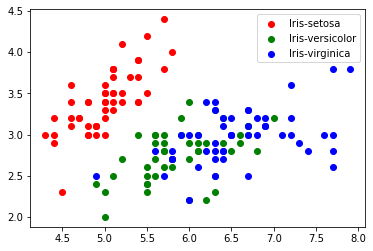

In [44]:
labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
color = ['r','g','b']
for i in range(0,3):
    df_individual = df[df['Classes'] == i]
    plt.scatter(df_individual['Sepal length'],df_individual['Sepal width'],c=color[i],label=labels[i])

plt.legend()
plt.show()

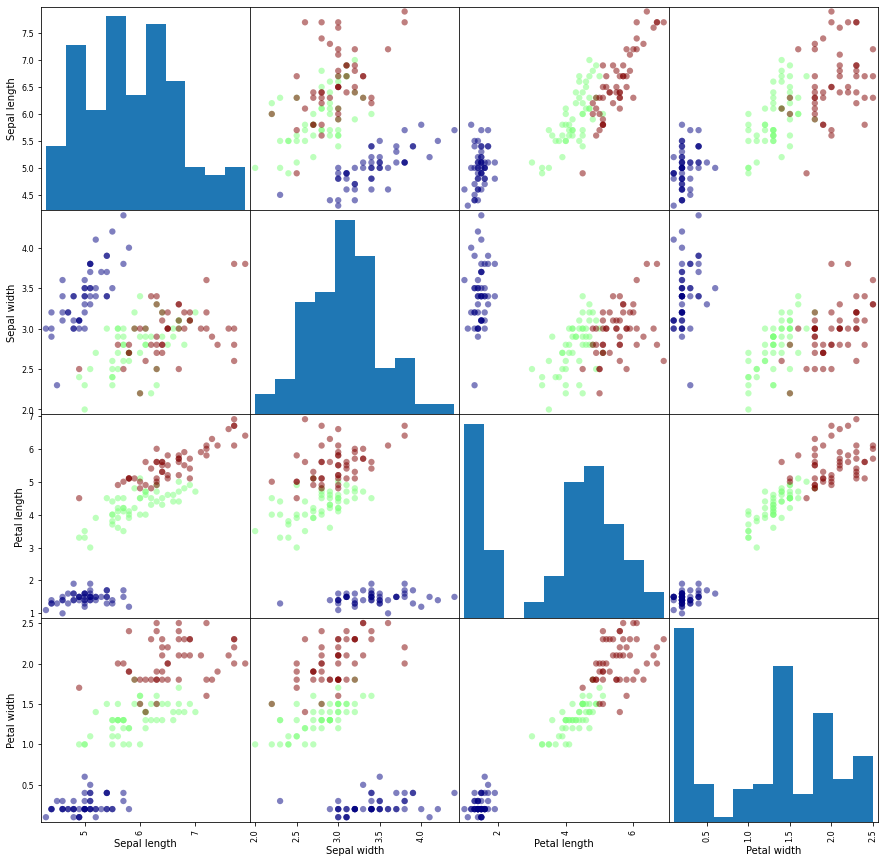

In [45]:
cmap = cm.get_cmap('jet')
scatter = pd.plotting.scatter_matrix(X,c=y, marker = 'o', s=40, figsize=(15,15), cmap=cmap)

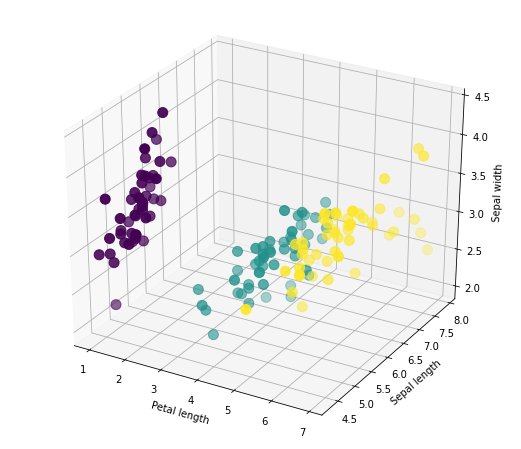

In [46]:
fig = plt.figure(1,figsize=(20,8))
ax = fig.add_subplot(121, projection = '3d')
ax.scatter(X['Petal length'], X['Sepal length'], X['Sepal width'], c = y, marker = 'o', s=100)
ax.set_xlabel('Petal length')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Sepal width')
plt.show()

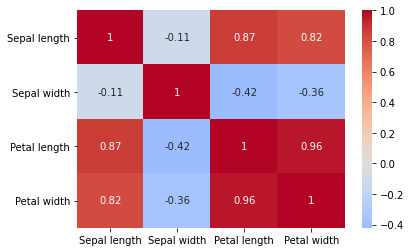

In [47]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',center= 0)

In [48]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=10)

In [49]:
knn = KNeighborsClassifier(n_neighbors=3)

In [50]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
y_pred = knn.predict(X_test)
y_pred

array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2], dtype=int64)

In [52]:
knn.score(X_test,y_test)

0.9666666666666667

In [53]:
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

0.9666666666666667
[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]


In [54]:
class Abc(Frame):
    def __init__(self,master):
        super().__init__(master)
        
        self.l1=Label(self,text='Sepal Length',font={'algerian',13})
        self.l2=Label(self,text='Sepal Width',font={'algerian',13})
        self.l3=Label(self,text='Petal Length',font={'algerian',13})
        self.l4=Label(self,text='Petal Width',font={'algerian',13})
        
        self.t1=Entry(self)
        self.t2=Entry(self)
        self.t3=Entry(self)
        self.t4=Entry(self)
        
        self.b1=Button(self,text='Predict',command=self.show)
        
        self.rowconfigure(index=0,pad=10)
        self.rowconfigure(index=1,pad=10)
        self.rowconfigure(index=2,pad=10)
        self.rowconfigure(index=3,pad=10)
        self.rowconfigure(index=4,pad=10)
        
        self.columnconfigure(index=0,pad=15)
        self.columnconfigure(index=1,pad=15)
        
        self.l1.grid(row=0,column=0)
        self.t1.grid(row=0,column=1)
        
        self.l2.grid(row=1,column=0)
        self.t2.grid(row=1,column=1)
        
        self.l3.grid(row=2,column=0)
        self.t3.grid(row=2,column=1)
        
        self.l4.grid(row=3,column=0)
        self.t4.grid(row=3,column=1)
        
        self.b1.grid(columnspan=2)
        self.pack()
    def show(self):
        sl=float(self.t1.get())
        sw=float(self.t2.get())
        pl=float(self.t3.get())
        pw=float(self.t4.get())
        testdata=[[sl,sw,pl,pw]]
        test=pd.DataFrame(testdata)
        pred = knn.predict(testdata)
        result = pred[0]
        msg.showinfo('Prediction',str(result))
        
        
root=Tk()
obj=Abc(root)
root.geometry('350x300')
root.mainloop()
        